# Lab | Clustering the songs from the databases

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

## Load the datasets

In [2]:
hot_songs = pd.read_csv('billboard_top_100.csv')
hot_songs.head()

,Song,Artist,ids,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Vampire,Olivia Rodrigo,4sSKTQcX6pQIncWcNJdkiD,0.675,0.609,1,-7.905,1,0.0940,0.284,0.268000,0.112,0.057,119.973,audio_features,4sSKTQcX6pQIncWcNJdkiD,spotify:track:4sSKTQcX6pQIncWcNJdkiD,https://api.spotify.com/v1/tracks/4sSKTQcX6pQI...,https://api.spotify.com/v1/audio-analysis/4sSK...,300000,4
1,Last Night,Morgan Wallen,59uQI0PADDKeE6UZDTJEe8,0.517,0.675,6,-5.382,1,0.0357,0.459,0.000000,0.151,0.518,203.853,audio_features,59uQI0PADDKeE6UZDTJEe8,spotify:track:59uQI0PADDKeE6UZDTJEe8,https://api.spotify.com/v1/tracks/59uQI0PADDKe...,https://api.spotify.com/v1/audio-analysis/59uQ...,163855,4
2,Fast Car,Luke Combs,1Lo0QY9cvc8sUB2vnIOxDT,0.712,0.603,8,-5.520,1,0.0262,0.186,0.000000,0.115,0.670,97.994,audio_features,1Lo0QY9cvc8sUB2vnIOxDT,spotify:track:1Lo0QY9cvc8sUB2vnIOxDT,https://api.spotify.com/v1/tracks/1Lo0QY9cvc8s...,https://api.spotify.com/v1/audio-analysis/1Lo0...,265493,4
3,Calm Down,Rema & Selena Gomez,0WtM2NBVQNNJLh6scP13H8,0.801,0.806,11,-5.206,1,0.0381,0.382,0.000669,0.114,0.802,106.999,audio_features,0WtM2NBVQNNJLh6scP13H8,spotify:track:0WtM2NBVQNNJLh6scP13H8,https://api.spotify.com/v1/tracks/0WtM2NBVQNNJ...,https://api.spotify.com/v1/audio-analysis/0WtM...,239318,4
4,Flowers,Miley Cyrus,3MnewZrZDqej6thgEx3OB1,0.672,0.159,9,-8.760,0,0.0343,0.962,0.000018,0.106,0.117,113.218,audio_features,3MnewZrZDqej6thgEx3OB1,spotify:track:3MnewZrZDqej6thgEx3OB1,https://api.spotify.com/v1/tracks/3MnewZrZDqej...,https://api.spotify.com/v1/audio-analysis/3Mne...,210827,4


In [3]:
not_hot_songs = pd.read_csv('not_hot_songs.csv')
not_hot_songs.head()

,track_id,Artist,album_name,Song,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,06isZAG9Bgm4jhPj7V0Rhx,Weezer,Weezer,The World Has Turned And Left Me Here,55,259466,False,0.455,0.918,6,-5.724,1,0.0352,0.000399,0.013400,0.323,0.560,99.078,4,power-pop
1,6sEOCx9dvZ2Vy3sI8HpZ3m,Ricchi E Poveri,Tutti in piscina Canzoni per bambini,Mamma Maria,0,188840,False,0.725,0.834,4,-6.142,0,0.0302,0.379000,0.000002,0.288,0.931,133.289,4,disco
2,07mEPA8M9EIsehueGzoHRG,Håkan Hellström,Håkan Boma Ye! (Live),Bara dårar rusar in (Live),27,260906,False,0.214,0.464,4,-10.513,1,0.0375,0.525000,0.000103,0.371,0.291,92.084,3,goth
3,7MIN37CiVP1lVjqKNmLMWk,Yann Tiersen,Le Fabuleux destin d'Amélie Poulain (Bande ori...,La valse d'Amélie,59,135906,False,0.433,0.564,9,-8.917,0,0.0405,0.713000,0.275000,0.117,0.855,192.070,3,french
4,0g8L4DJyzH7CG0nPqGtNlR,Nando Reis;Cachorro Grande,A Arte De Nando Reis,Por Onde Andei - Ao Vivo,49,235626,False,0.386,0.819,0,-7.890,1,0.0523,0.131000,0.000008,0.365,0.817,172.034,4,mpb


## Audio features selection

In [4]:
hot_songs.drop(['uri','track_href','type','id','duration_ms','time_signature','analysis_url'], axis=1, inplace=True)
hot_songs.head()
#hot_df_selected = hot_df.iloc[:, 3:14]
#print(hot_df_selected)

,Song,Artist,ids,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Vampire,Olivia Rodrigo,4sSKTQcX6pQIncWcNJdkiD,0.675,0.609,1,-7.905,1,0.0940,0.284,0.268000,0.112,0.057,119.973
1,Last Night,Morgan Wallen,59uQI0PADDKeE6UZDTJEe8,0.517,0.675,6,-5.382,1,0.0357,0.459,0.000000,0.151,0.518,203.853
2,Fast Car,Luke Combs,1Lo0QY9cvc8sUB2vnIOxDT,0.712,0.603,8,-5.520,1,0.0262,0.186,0.000000,0.115,0.670,97.994
3,Calm Down,Rema & Selena Gomez,0WtM2NBVQNNJLh6scP13H8,0.801,0.806,11,-5.206,1,0.0381,0.382,0.000669,0.114,0.802,106.999
4,Flowers,Miley Cyrus,3MnewZrZDqej6thgEx3OB1,0.672,0.159,9,-8.760,0,0.0343,0.962,0.000018,0.106,0.117,113.218


In [5]:
not_hot_songs.drop(['album_name','popularity','duration_ms','explicit','time_signature','track_genre'], axis=1, inplace=True)
not_hot_songs.head()

,track_id,Artist,Song,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,06isZAG9Bgm4jhPj7V0Rhx,Weezer,The World Has Turned And Left Me Here,0.455,0.918,6,-5.724,1,0.0352,0.000399,0.013400,0.323,0.560,99.078
1,6sEOCx9dvZ2Vy3sI8HpZ3m,Ricchi E Poveri,Mamma Maria,0.725,0.834,4,-6.142,0,0.0302,0.379000,0.000002,0.288,0.931,133.289
2,07mEPA8M9EIsehueGzoHRG,Håkan Hellström,Bara dårar rusar in (Live),0.214,0.464,4,-10.513,1,0.0375,0.525000,0.000103,0.371,0.291,92.084
3,7MIN37CiVP1lVjqKNmLMWk,Yann Tiersen,La valse d'Amélie,0.433,0.564,9,-8.917,0,0.0405,0.713000,0.275000,0.117,0.855,192.070
4,0g8L4DJyzH7CG0nPqGtNlR,Nando Reis;Cachorro Grande,Por Onde Andei - Ao Vivo,0.386,0.819,0,-7.890,1,0.0523,0.131000,0.000008,0.365,0.817,172.034


In [6]:
hot_songs.columns

Index(['Song', 'Artist', 'ids', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo'],
      dtype='object')

In [7]:
not_hot_songs.columns

Index(['track_id', 'Artist', 'Song', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo'],
      dtype='object')

In [8]:
hot_songs.rename(columns={'ids':'track_id'},inplace=True)
hot_songs.head()

,Song,Artist,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Vampire,Olivia Rodrigo,4sSKTQcX6pQIncWcNJdkiD,0.675,0.609,1,-7.905,1,0.0940,0.284,0.268000,0.112,0.057,119.973
1,Last Night,Morgan Wallen,59uQI0PADDKeE6UZDTJEe8,0.517,0.675,6,-5.382,1,0.0357,0.459,0.000000,0.151,0.518,203.853
2,Fast Car,Luke Combs,1Lo0QY9cvc8sUB2vnIOxDT,0.712,0.603,8,-5.520,1,0.0262,0.186,0.000000,0.115,0.670,97.994
3,Calm Down,Rema & Selena Gomez,0WtM2NBVQNNJLh6scP13H8,0.801,0.806,11,-5.206,1,0.0381,0.382,0.000669,0.114,0.802,106.999
4,Flowers,Miley Cyrus,3MnewZrZDqej6thgEx3OB1,0.672,0.159,9,-8.760,0,0.0343,0.962,0.000018,0.106,0.117,113.218


In [9]:
not_hot_songs = not_hot_songs[['Song', 'Artist', 'track_id', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']]
not_hot_songs.head()

,Song,Artist,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,The World Has Turned And Left Me Here,Weezer,06isZAG9Bgm4jhPj7V0Rhx,0.455,0.918,6,-5.724,1,0.0352,0.000399,0.013400,0.323,0.560,99.078
1,Mamma Maria,Ricchi E Poveri,6sEOCx9dvZ2Vy3sI8HpZ3m,0.725,0.834,4,-6.142,0,0.0302,0.379000,0.000002,0.288,0.931,133.289
2,Bara dårar rusar in (Live),Håkan Hellström,07mEPA8M9EIsehueGzoHRG,0.214,0.464,4,-10.513,1,0.0375,0.525000,0.000103,0.371,0.291,92.084
3,La valse d'Amélie,Yann Tiersen,7MIN37CiVP1lVjqKNmLMWk,0.433,0.564,9,-8.917,0,0.0405,0.713000,0.275000,0.117,0.855,192.070
4,Por Onde Andei - Ao Vivo,Nando Reis;Cachorro Grande,0g8L4DJyzH7CG0nPqGtNlR,0.386,0.819,0,-7.890,1,0.0523,0.131000,0.000008,0.365,0.817,172.034


In [10]:
hot_songs.columns

Index(['Song', 'Artist', 'track_id', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo'],
      dtype='object')

In [11]:
not_hot_songs.columns

Index(['Song', 'Artist', 'track_id', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo'],
      dtype='object')

## Add new "dataset" column

In [12]:
hot_songs['dataset'] = "Hot"
hot_songs.head()

,Song,Artist,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,dataset
0,Vampire,Olivia Rodrigo,4sSKTQcX6pQIncWcNJdkiD,0.675,0.609,1,-7.905,1,0.0940,0.284,0.268000,0.112,0.057,119.973,Hot
1,Last Night,Morgan Wallen,59uQI0PADDKeE6UZDTJEe8,0.517,0.675,6,-5.382,1,0.0357,0.459,0.000000,0.151,0.518,203.853,Hot
2,Fast Car,Luke Combs,1Lo0QY9cvc8sUB2vnIOxDT,0.712,0.603,8,-5.520,1,0.0262,0.186,0.000000,0.115,0.670,97.994,Hot
3,Calm Down,Rema & Selena Gomez,0WtM2NBVQNNJLh6scP13H8,0.801,0.806,11,-5.206,1,0.0381,0.382,0.000669,0.114,0.802,106.999,Hot
4,Flowers,Miley Cyrus,3MnewZrZDqej6thgEx3OB1,0.672,0.159,9,-8.760,0,0.0343,0.962,0.000018,0.106,0.117,113.218,Hot


In [13]:
not_hot_songs['dataset'] = "Not Hot"
not_hot_songs.head()

,Song,Artist,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,dataset
0,The World Has Turned And Left Me Here,Weezer,06isZAG9Bgm4jhPj7V0Rhx,0.455,0.918,6,-5.724,1,0.0352,0.000399,0.013400,0.323,0.560,99.078,Not Hot
1,Mamma Maria,Ricchi E Poveri,6sEOCx9dvZ2Vy3sI8HpZ3m,0.725,0.834,4,-6.142,0,0.0302,0.379000,0.000002,0.288,0.931,133.289,Not Hot
2,Bara dårar rusar in (Live),Håkan Hellström,07mEPA8M9EIsehueGzoHRG,0.214,0.464,4,-10.513,1,0.0375,0.525000,0.000103,0.371,0.291,92.084,Not Hot
3,La valse d'Amélie,Yann Tiersen,7MIN37CiVP1lVjqKNmLMWk,0.433,0.564,9,-8.917,0,0.0405,0.713000,0.275000,0.117,0.855,192.070,Not Hot
4,Por Onde Andei - Ao Vivo,Nando Reis;Cachorro Grande,0g8L4DJyzH7CG0nPqGtNlR,0.386,0.819,0,-7.890,1,0.0523,0.131000,0.000008,0.365,0.817,172.034,Not Hot


In [14]:
display(hot_songs.shape)
display(not_hot_songs.shape)

(100, 15)

(3000, 15)

## Concatenate the databases

In [15]:
songs = pd.concat([hot_songs, not_hot_songs],axis=0).reset_index(drop=True)
display(songs.shape)
songs.head()

(3100, 15)

,Song,Artist,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,dataset
0,Vampire,Olivia Rodrigo,4sSKTQcX6pQIncWcNJdkiD,0.675,0.609,1,-7.905,1,0.0940,0.284,0.268000,0.112,0.057,119.973,Hot
1,Last Night,Morgan Wallen,59uQI0PADDKeE6UZDTJEe8,0.517,0.675,6,-5.382,1,0.0357,0.459,0.000000,0.151,0.518,203.853,Hot
2,Fast Car,Luke Combs,1Lo0QY9cvc8sUB2vnIOxDT,0.712,0.603,8,-5.520,1,0.0262,0.186,0.000000,0.115,0.670,97.994,Hot
3,Calm Down,Rema & Selena Gomez,0WtM2NBVQNNJLh6scP13H8,0.801,0.806,11,-5.206,1,0.0381,0.382,0.000669,0.114,0.802,106.999,Hot
4,Flowers,Miley Cyrus,3MnewZrZDqej6thgEx3OB1,0.672,0.159,9,-8.760,0,0.0343,0.962,0.000018,0.106,0.117,113.218,Hot


## Scale

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle

In [17]:
numerical = songs.select_dtypes(include=np.number)
display(numerical.head())
numerical.shape

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.675,0.609,1,-7.905,1,0.0940,0.284,0.268000,0.112,0.057,119.973
1,0.517,0.675,6,-5.382,1,0.0357,0.459,0.000000,0.151,0.518,203.853
2,0.712,0.603,8,-5.520,1,0.0262,0.186,0.000000,0.115,0.670,97.994
3,0.801,0.806,11,-5.206,1,0.0381,0.382,0.000669,0.114,0.802,106.999
4,0.672,0.159,9,-8.760,0,0.0343,0.962,0.000018,0.106,0.117,113.218


(3100, 11)

In [18]:
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,3100.0,0.563662,0.177189,0.000000,0.452000,0.58000,0.69000,0.965
energy,3100.0,0.637042,0.255494,0.000028,0.467000,0.68200,0.85200,1.000
key,3100.0,5.272581,3.565759,0.000000,2.000000,5.00000,8.00000,11.000
loudness,3100.0,-8.405379,5.197126,-38.003000,-10.182250,-7.00250,-5.01600,-0.079
mode,3100.0,0.625161,0.484159,0.000000,0.000000,1.00000,1.00000,1.000
speechiness,3100.0,0.086189,0.107830,0.000000,0.035700,0.04940,0.08720,0.960
acousticness,3100.0,0.324054,0.335601,0.000001,0.016875,0.18800,0.61725,0.996
instrumentalness,3100.0,0.171277,0.324245,0.000000,0.000000,0.00004,0.08030,1.000
liveness,3100.0,0.212401,0.191484,0.017600,0.096575,0.12900,0.27400,0.986
valence,3100.0,0.473577,0.261132,0.000000,0.252750,0.46200,0.68525,0.984


In [19]:
scaler = StandardScaler() 
scaler.fit(numerical) 
num_scaled = scaler.transform(numerical)
filename = "scaler.pickle" 

with open(filename, "wb") as file: 
        pickle.dump(scaler,file)

num_scaled_df = pd.DataFrame(num_scaled, columns = numerical.columns)
display(numerical.head())
display(numerical.shape)
display(num_scaled_df.head())
display(num_scaled_df.shape)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.675,0.609,1,-7.905,1,0.0940,0.284,0.268000,0.112,0.057,119.973
1,0.517,0.675,6,-5.382,1,0.0357,0.459,0.000000,0.151,0.518,203.853
2,0.712,0.603,8,-5.520,1,0.0262,0.186,0.000000,0.115,0.670,97.994
3,0.801,0.806,11,-5.206,1,0.0381,0.382,0.000669,0.114,0.802,106.999
4,0.672,0.159,9,-8.760,0,0.0343,0.962,0.000018,0.106,0.117,113.218


(3100, 11)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.628460,-0.109772,-1.198418,0.096295,0.774330,0.072453,-0.119369,0.298349,-0.524414,-1.595534,-0.036944
1,-0.263386,0.148592,0.204034,0.581834,0.774330,-0.468302,0.402168,-0.528320,-0.320708,0.170143,2.757816
2,0.837310,-0.133260,0.765015,0.555277,0.774330,-0.556418,-0.411429,-0.528320,-0.508744,0.752319,-0.769253
3,1.339678,0.661406,1.606486,0.615705,0.774330,-0.446041,0.172692,-0.526256,-0.513967,1.257892,-0.469219
4,0.611526,-1.871348,1.045505,-0.068245,-1.291439,-0.481288,1.901214,-0.528263,-0.555753,-1.365728,-0.262011


(3100, 11)

In [20]:
num_scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,3100.0,1.833659e-17,1.000161,-3.181639,-0.630284,0.092224,0.713129,2.265391
energy,3100.0,-1.730515e-16,1.000161,-2.493660,-0.665647,0.175994,0.841478,1.420841
key,3100.0,8.022257e-17,1.000161,-1.478908,-0.917928,-0.076456,0.765015,1.606486
loudness,3100.0,6.876220e-17,1.000161,-5.695916,-0.341950,0.269977,0.652269,1.602371
mode,3100.0,8.480671e-17,1.000161,-1.291439,-1.291439,0.774330,0.774330,0.774330
speechiness,3100.0,-8.480671e-17,1.000161,-0.799434,-0.468302,-0.341229,0.009380,8.104941
acousticness,3100.0,-2.314994e-16,1.000161,-0.965745,-0.915457,-0.405469,0.873786,2.002541
instrumentalness,3100.0,-3.896525e-17,1.000161,-0.528320,-0.528320,-0.528197,-0.280627,2.556267
liveness,3100.0,-5.271769e-17,1.000161,-1.017485,-0.604982,-0.435619,0.321747,4.040678
valence,3100.0,2.888012e-16,1.000161,-1.813850,-0.845792,-0.044343,0.810728,1.954971


## K-Means

### Choosing K

Training a K-Means model with 2 clusters! 

Initialization complete
Iteration 0, inertia 46656.28577293009.
Iteration 1, inertia 30693.456124447235.
Iteration 2, inertia 29400.019528319914.
Iteration 3, inertia 28545.2465216118.
Iteration 4, inertia 28153.562434909316.
Iteration 5, inertia 27974.990627321902.
Iteration 6, inertia 27904.952036962997.
Iteration 7, inertia 27880.382781603443.
Iteration 8, inertia 27871.16614056416.
Iteration 9, inertia 27868.722069619038.
Iteration 10, inertia 27868.40441466866.
Iteration 11, inertia 27868.17282310137.
Converged at iteration 11: center shift 2.1475909518296662e-05 within tolerance 9.999999999999948e-05.
Initialization complete


C:\Users\laura\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 37367.52734611485.
Iteration 1, inertia 28362.464204038446.
Iteration 2, inertia 28114.69062590741.
Iteration 3, inertia 27987.221607319978.
Iteration 4, inertia 27920.040914685167.
Iteration 5, inertia 27892.736109941783.
Iteration 6, inertia 27881.237246211866.
Iteration 7, inertia 27875.195930815946.
Iteration 8, inertia 27870.53958734053.
Iteration 9, inertia 27868.289817476005.
Iteration 10, inertia 27867.929346537825.
Converged at iteration 10: center shift 5.101841265076108e-05 within tolerance 9.999999999999948e-05.
Initialization complete
Iteration 0, inertia 43382.105928528734.
Iteration 1, inertia 27943.252235009746.
Iteration 2, inertia 27896.15622151114.
Iteration 3, inertia 27882.640384670285.
Iteration 4, inertia 27875.195930815946.
Iteration 5, inertia 27870.53958734053.
Iteration 6, inertia 27868.289817476005.
Iteration 7, inertia 27867.929346537825.
Converged at iteration 7: center shift 5.1018412650760565e-05 within tolerance 9.999999999999948e-0

C:\Users\laura\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 35688.33523125069.
Iteration 1, inertia 25962.29088448648.
Iteration 2, inertia 25766.027375797483.
Iteration 3, inertia 25718.616396120884.
Iteration 4, inertia 25711.54428956079.
Iteration 5, inertia 25708.471726716813.
Iteration 6, inertia 25705.593648129412.
Iteration 7, inertia 25702.767801582755.
Iteration 8, inertia 25699.09416631084.
Iteration 9, inertia 25696.848082482746.
Iteration 10, inertia 25695.759602803537.
Iteration 11, inertia 25694.34261124521.
Iteration 12, inertia 25693.326121215534.
Iteration 13, inertia 25693.123380829922.
Iteration 14, inertia 25692.893290897853.
Iteration 15, inertia 25692.805960953938.
Iteration 16, inertia 25692.75500443368.
Converged at iteration 16: strict convergence.
Initialization complete
Iteration 0, inertia 38612.4180959362.
Iteration 1, inertia 28968.667905650378.
Iteration 2, inertia 27851.67286987148.
Iteration 3, inertia 26835.506943457072.
Iteration 4, inertia 26141.23776813207.
Iteration 5, inertia 25882.192

C:\Users\laura\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 32880.33382659965.
Iteration 1, inertia 24965.954102550753.
Iteration 2, inertia 24398.342279678825.
Iteration 3, inertia 24273.892428691408.
Iteration 4, inertia 24217.15581417991.
Iteration 5, inertia 24195.263872611755.
Iteration 6, inertia 24168.358950476675.
Iteration 7, inertia 24132.161826177362.
Iteration 8, inertia 24101.429362202496.
Iteration 9, inertia 24078.060759713255.
Iteration 10, inertia 24056.999750967847.
Iteration 11, inertia 24041.91332352205.
Iteration 12, inertia 24030.742439544447.
Iteration 13, inertia 24023.07898312865.
Iteration 14, inertia 24021.177253144462.
Iteration 15, inertia 24020.514631568338.
Iteration 16, inertia 24019.678212944596.
Iteration 17, inertia 24018.935345347192.
Iteration 18, inertia 24017.922387099195.
Iteration 19, inertia 24017.52166371622.
Iteration 20, inertia 24017.250525165204.
Iteration 21, inertia 24016.731583749362.
Iteration 22, inertia 24016.324534138592.
Iteration 23, inertia 24016.098641280503.
Iterati

C:\Users\laura\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 35454.454141596194.
Iteration 1, inertia 24791.55769093005.
Iteration 2, inertia 23696.701530037564.
Iteration 3, inertia 23033.889173526593.
Iteration 4, inertia 22667.42159006494.
Iteration 5, inertia 22506.369180013655.
Iteration 6, inertia 22421.37968965737.
Iteration 7, inertia 22385.721487780553.
Iteration 8, inertia 22351.104660133828.
Iteration 9, inertia 22293.850094894395.
Iteration 10, inertia 22170.860151194865.
Iteration 11, inertia 22025.702436477626.
Iteration 12, inertia 21895.017606774814.
Iteration 13, inertia 21778.166921359043.
Iteration 14, inertia 21739.141268654876.
Iteration 15, inertia 21732.147154765687.
Iteration 16, inertia 21728.423363969476.
Iteration 17, inertia 21727.546589087135.
Iteration 18, inertia 21727.178315082157.
Iteration 19, inertia 21726.98545181818.
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 33248.31124029194.
Iteration 1, inertia 23922.705145414802.
Iteration 2, inertia 2

C:\Users\laura\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 30135.474722264807.
Iteration 1, inertia 22620.67024530407.
Iteration 2, inertia 21934.533293612043.
Iteration 3, inertia 21620.78582702732.
Iteration 4, inertia 21390.060948328577.
Iteration 5, inertia 21189.289063257267.
Iteration 6, inertia 21006.93540042236.
Iteration 7, inertia 20761.235458269348.
Iteration 8, inertia 20573.80824599972.
Iteration 9, inertia 20499.728313465646.
Iteration 10, inertia 20468.996570896274.
Iteration 11, inertia 20456.398018395525.
Iteration 12, inertia 20451.213532424663.
Iteration 13, inertia 20448.86698244479.
Iteration 14, inertia 20447.71721986882.
Iteration 15, inertia 20447.074122043687.
Iteration 16, inertia 20446.822243900617.
Converged at iteration 16: center shift 4.036868636241595e-05 within tolerance 9.999999999999948e-05.
Initialization complete
Iteration 0, inertia 32139.188023109495.
Iteration 1, inertia 22576.99159738862.
Iteration 2, inertia 22130.740756563748.
Iteration 3, inertia 21922.35908917276.
Iteration 4, i

C:\Users\laura\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 29846.621858235805.
Iteration 1, inertia 21641.261661753193.
Iteration 2, inertia 21060.282980024454.
Iteration 3, inertia 20679.804205294226.
Iteration 4, inertia 20353.25600307995.
Iteration 5, inertia 20033.804147043887.
Iteration 6, inertia 19698.1137340731.
Iteration 7, inertia 19531.636580556642.
Iteration 8, inertia 19499.130057883838.
Iteration 9, inertia 19487.090451511005.
Iteration 10, inertia 19481.793668967035.
Iteration 11, inertia 19479.955541498144.
Iteration 12, inertia 19479.214354082516.
Iteration 13, inertia 19478.76015130691.
Iteration 14, inertia 19478.6211693649.
Converged at iteration 14: center shift 9.220038657498631e-05 within tolerance 9.999999999999948e-05.
Initialization complete
Iteration 0, inertia 30148.938485435145.
Iteration 1, inertia 21380.746368332635.
Iteration 2, inertia 20946.24631476898.
Iteration 3, inertia 20651.16645444547.
Iteration 4, inertia 20369.084117094226.
Iteration 5, inertia 20147.826929179555.
Iteration 6, ine

Training a K-Means model with 8 clusters! 

Initialization complete
Iteration 0, inertia 28193.642260174292.
Iteration 1, inertia 20300.79499180174.
Iteration 2, inertia 19175.170286523593.
Iteration 3, inertia 18634.344672374344.
Iteration 4, inertia 18281.30000302746.
Iteration 5, inertia 18104.901278571095.
Iteration 6, inertia 18025.18592504967.
Iteration 7, inertia 17981.119165343458.
Iteration 8, inertia 17953.297532086308.
Iteration 9, inertia 17934.559736154333.
Iteration 10, inertia 17921.627084459084.
Iteration 11, inertia 17910.876722851193.
Iteration 12, inertia 17901.505869945166.
Iteration 13, inertia 17886.612800960153.
Iteration 14, inertia 17872.74317766666.
Iteration 15, inertia 17857.92131634886.
Iteration 16, inertia 17832.870387082192.
Iteration 17, inertia 17824.36928455223.
Iteration 18, inertia 17820.61773424228.
Iteration 19, inertia 17814.403702672447.
Iteration 20, inertia 17807.430635881028.
Iteration 21, inertia 17804.67292700581.
Iteration 22, inertia 1780

C:\Users\laura\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 25781.94594303072.
Iteration 1, inertia 20222.075847467717.
Iteration 2, inertia 19731.81152367072.
Iteration 3, inertia 19476.908742829066.
Iteration 4, inertia 19240.320587654103.
Iteration 5, inertia 18972.913244680232.
Iteration 6, inertia 18656.091475413403.
Iteration 7, inertia 18484.613292973725.
Iteration 8, inertia 18412.195236938478.
Iteration 9, inertia 18364.056944168155.
Iteration 10, inertia 18287.34650482449.
Iteration 11, inertia 18174.24860909645.
Iteration 12, inertia 18034.76336965141.
Iteration 13, inertia 17925.46513100723.
Iteration 14, inertia 17885.8546843387.
Iteration 15, inertia 17863.964272444042.
Iteration 16, inertia 17853.413248693705.
Iteration 17, inertia 17838.507489002925.
Iteration 18, inertia 17819.47077524433.
Iteration 19, inertia 17809.152856320095.
Iteration 20, inertia 17805.50808309373.
Iteration 21, inertia 17803.8680638848.
Iteration 22, inertia 17803.116948257826.
Iteration 23, inertia 17802.65944475059.
Iteration 24, i

Training a K-Means model with 9 clusters! 

Initialization complete
Iteration 0, inertia 27083.527193823153.
Iteration 1, inertia 19451.33050615781.
Iteration 2, inertia 18134.248588755006.
Iteration 3, inertia 17684.506305193805.
Iteration 4, inertia 17468.72332381604.
Iteration 5, inertia 17371.414860552555.
Iteration 6, inertia 17315.947268522556.
Iteration 7, inertia 17266.353294407105.
Iteration 8, inertia 17216.8988804608.
Iteration 9, inertia 17174.718458447747.
Iteration 10, inertia 17154.862040476946.
Iteration 11, inertia 17129.1682164473.
Iteration 12, inertia 17107.413568181757.
Iteration 13, inertia 17097.075533438023.
Iteration 14, inertia 17090.80445975721.
Iteration 15, inertia 17088.774563474293.
Iteration 16, inertia 17087.21324332215.
Iteration 17, inertia 17086.84698120514.
Iteration 18, inertia 17086.65802926577.
Iteration 19, inertia 17086.58618503339.
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 24874.10631320569.
It

C:\Users\laura\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 25996.428402700385.
Iteration 1, inertia 20204.812352360008.
Iteration 2, inertia 19485.559848558998.
Iteration 3, inertia 19172.80263469002.
Iteration 4, inertia 18845.07660515195.
Iteration 5, inertia 18556.629873622813.
Iteration 6, inertia 18346.142336106677.
Iteration 7, inertia 18271.302652745515.
Iteration 8, inertia 18187.2664768991.
Iteration 9, inertia 18090.34179992882.
Iteration 10, inertia 18021.896852309055.
Iteration 11, inertia 17973.718739822703.
Iteration 12, inertia 17935.759922397378.
Iteration 13, inertia 17911.975552196793.
Iteration 14, inertia 17904.88087909246.
Iteration 15, inertia 17894.14046812271.
Iteration 16, inertia 17890.270484662626.
Iteration 17, inertia 17888.844490828902.
Iteration 18, inertia 17887.70283926476.
Iteration 19, inertia 17886.18510034777.
Iteration 20, inertia 17883.631324524642.
Converged at iteration 20: strict convergence.
Initialization complete
Iteration 0, inertia 25475.73083254543.
Iteration 1, inertia 19324

Iteration 42, inertia 17152.561032636015.
Iteration 43, inertia 17152.09039718253.
Iteration 44, inertia 17151.825554935116.
Iteration 45, inertia 17151.687380321266.
Iteration 46, inertia 17151.57495114557.
Converged at iteration 46: center shift 9.912112661541031e-05 within tolerance 9.999999999999948e-05.
Training a K-Means model with 10 clusters! 

Initialization complete
Iteration 0, inertia 25259.104883418375.
Iteration 1, inertia 18484.433613566733.
Iteration 2, inertia 17549.113675710934.
Iteration 3, inertia 17179.678958900062.
Iteration 4, inertia 16971.498240236484.
Iteration 5, inertia 16858.237960802544.
Iteration 6, inertia 16806.101429944283.
Iteration 7, inertia 16760.09386654728.
Iteration 8, inertia 16712.242825469522.
Iteration 9, inertia 16665.79002988739.
Iteration 10, inertia 16611.510470732566.
Iteration 11, inertia 16579.621858090195.
Iteration 12, inertia 16552.226062492686.
Iteration 13, inertia 16542.258297990353.
Iteration 14, inertia 16536.22842568245.
Iter

C:\Users\laura\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 23681.53787590451.
Iteration 1, inertia 19620.38127945511.
Iteration 2, inertia 18982.77654195442.
Iteration 3, inertia 18451.179234424486.
Iteration 4, inertia 18155.53272384867.
Iteration 5, inertia 18018.48469384138.
Iteration 6, inertia 17919.091693567418.
Iteration 7, inertia 17850.72202779117.
Iteration 8, inertia 17810.77831400234.
Iteration 9, inertia 17782.25271108113.
Iteration 10, inertia 17742.26688821658.
Iteration 11, inertia 17699.847551660234.
Iteration 12, inertia 17656.02767938075.
Iteration 13, inertia 17618.61653297201.
Iteration 14, inertia 17573.12110874308.
Iteration 15, inertia 17552.566697412658.
Iteration 16, inertia 17538.048248482202.
Iteration 17, inertia 17528.04192702057.
Iteration 18, inertia 17522.535571696317.
Iteration 19, inertia 17519.197041591804.
Iteration 20, inertia 17516.957980767467.
Iteration 21, inertia 17513.82837369566.
Iteration 22, inertia 17509.28667331463.
Iteration 23, inertia 17507.89176294778.
Iteration 24, iner

Iteration 0, inertia 24023.49068366055.
Iteration 1, inertia 17688.36352166099.
Iteration 2, inertia 17087.453288560508.
Iteration 3, inertia 16935.470742152578.
Iteration 4, inertia 16842.683740104225.
Iteration 5, inertia 16781.38259165068.
Iteration 6, inertia 16744.26564485808.
Iteration 7, inertia 16716.2334561166.
Iteration 8, inertia 16692.69751543444.
Iteration 9, inertia 16676.309397228433.
Iteration 10, inertia 16667.96640294971.
Iteration 11, inertia 16661.12485751853.
Iteration 12, inertia 16655.641472137246.
Iteration 13, inertia 16652.575484336216.
Iteration 14, inertia 16652.33296954048.
Converged at iteration 14: strict convergence.
Training a K-Means model with 11 clusters! 

Initialization complete
Iteration 0, inertia 24319.585259692758.
Iteration 1, inertia 17972.7437679019.
Iteration 2, inertia 17228.67686624713.
Iteration 3, inertia 16849.978966637347.
Iteration 4, inertia 16629.894349528102.
Iteration 5, inertia 16513.078421747327.
Iteration 6, inertia 16425.6496

C:\Users\laura\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 22251.907119790954.
Iteration 1, inertia 17544.1482907278.
Iteration 2, inertia 16994.630760705193.
Iteration 3, inertia 16836.144469916253.
Iteration 4, inertia 16785.196541451696.
Iteration 5, inertia 16764.101413195345.
Iteration 6, inertia 16751.824304259553.
Iteration 7, inertia 16743.26666374013.
Iteration 8, inertia 16732.596854519576.
Iteration 9, inertia 16722.53423048935.
Iteration 10, inertia 16709.65123830189.
Iteration 11, inertia 16688.967283937487.
Iteration 12, inertia 16662.39710930739.
Iteration 13, inertia 16630.773230975185.
Iteration 14, inertia 16580.135666395105.
Iteration 15, inertia 16524.59394425518.
Iteration 16, inertia 16478.983151053948.
Iteration 17, inertia 16455.105498482575.
Iteration 18, inertia 16445.820277115057.
Iteration 19, inertia 16438.024436054704.
Iteration 20, inertia 16432.89701212971.
Iteration 21, inertia 16430.46730315018.
Iteration 22, inertia 16429.183138551005.
Iteration 23, inertia 16428.216525610012.
Iteration 2

Iteration 0, inertia 24133.067532555622.
Iteration 1, inertia 18508.02227141997.
Iteration 2, inertia 17840.672666362323.
Iteration 3, inertia 17483.637990574414.
Iteration 4, inertia 17218.66135347513.
Iteration 5, inertia 16985.12989253343.
Iteration 6, inertia 16757.877899490326.
Iteration 7, inertia 16634.171822100907.
Iteration 8, inertia 16563.937875758427.
Iteration 9, inertia 16511.223545855053.
Iteration 10, inertia 16477.218163378686.
Iteration 11, inertia 16457.743194657003.
Iteration 12, inertia 16444.921030657468.
Iteration 13, inertia 16434.24511349914.
Iteration 14, inertia 16425.610370432896.
Iteration 15, inertia 16418.144522813593.
Iteration 16, inertia 16411.185220779207.
Iteration 17, inertia 16406.391959644097.
Iteration 18, inertia 16403.679863865575.
Iteration 19, inertia 16401.08139069836.
Iteration 20, inertia 16398.989395223696.
Iteration 21, inertia 16396.46198852521.
Iteration 22, inertia 16393.497576266793.
Iteration 23, inertia 16388.74576273602.
Iteration

C:\Users\laura\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 22445.07570341761.
Iteration 1, inertia 17390.41123669481.
Iteration 2, inertia 16629.194955897907.
Iteration 3, inertia 16335.547090494374.
Iteration 4, inertia 16251.572953591512.
Iteration 5, inertia 16210.334884800128.
Iteration 6, inertia 16186.650247172869.
Iteration 7, inertia 16165.012123465143.
Iteration 8, inertia 16146.512547895587.
Iteration 9, inertia 16129.208260256431.
Iteration 10, inertia 16118.678785234775.
Iteration 11, inertia 16114.363501439972.
Iteration 12, inertia 16110.9161249631.
Iteration 13, inertia 16107.892932188386.
Iteration 14, inertia 16105.03131447181.
Iteration 15, inertia 16102.951752437128.
Iteration 16, inertia 16102.093434162332.
Iteration 17, inertia 16100.901303259154.
Iteration 18, inertia 16100.616172946397.
Converged at iteration 18: strict convergence.
Initialization complete
Iteration 0, inertia 22766.807709221568.
Iteration 1, inertia 18266.14053007743.
Iteration 2, inertia 17658.611916155027.
Iteration 3, inertia 173

Initialization complete
Iteration 0, inertia 22202.47017563364.
Iteration 1, inertia 17409.858312674063.
Iteration 2, inertia 16582.631040918583.
Iteration 3, inertia 16343.50729062181.
Iteration 4, inertia 16253.028013126157.
Iteration 5, inertia 16198.329325789007.
Iteration 6, inertia 16138.50373650671.
Iteration 7, inertia 16084.89646569477.
Iteration 8, inertia 16043.94754933731.
Iteration 9, inertia 15996.180394938241.
Iteration 10, inertia 15962.43882765346.
Iteration 11, inertia 15936.326903754269.
Iteration 12, inertia 15913.174875637507.
Iteration 13, inertia 15882.440547416443.
Iteration 14, inertia 15856.97056296378.
Iteration 15, inertia 15833.827997183296.
Iteration 16, inertia 15810.749468604234.
Iteration 17, inertia 15786.574715684068.
Iteration 18, inertia 15762.674663672362.
Iteration 19, inertia 15748.953006945885.
Iteration 20, inertia 15742.737831128437.
Iteration 21, inertia 15739.032270921116.
Iteration 22, inertia 15737.29315047229.
Iteration 23, inertia 15735.

C:\Users\laura\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 21655.875018825634.
Iteration 1, inertia 16581.081687491926.
Iteration 2, inertia 15894.83904287356.
Iteration 3, inertia 15725.451800620122.
Iteration 4, inertia 15636.321140645581.
Iteration 5, inertia 15550.879410048188.
Iteration 6, inertia 15461.122412401532.
Iteration 7, inertia 15381.92319776648.
Iteration 8, inertia 15354.842683187488.
Iteration 9, inertia 15345.007918227324.
Iteration 10, inertia 15340.27907448361.
Iteration 11, inertia 15337.09189283525.
Iteration 12, inertia 15335.901898332715.
Iteration 13, inertia 15334.734996934829.
Iteration 14, inertia 15333.671609327585.
Iteration 15, inertia 15333.0214597422.
Iteration 16, inertia 15332.818027668904.
Iteration 17, inertia 15332.753265892421.
Iteration 18, inertia 15332.683805234143.
Iteration 19, inertia 15332.606571346114.
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 20812.47859489858.
Iteration 1, inertia 17001.795602310896.
Iteration 2, inertia 165

Training a K-Means model with 14 clusters! 

Initialization complete
Iteration 0, inertia 21799.526283902087.
Iteration 1, inertia 16721.48058027966.
Iteration 2, inertia 15819.98106510707.
Iteration 3, inertia 15379.156742810517.
Iteration 4, inertia 15126.774485930378.
Iteration 5, inertia 15009.72099333994.
Iteration 6, inertia 14979.46215730089.
Iteration 7, inertia 14952.462654996216.
Iteration 8, inertia 14934.541608633905.
Iteration 9, inertia 14917.855112178722.
Iteration 10, inertia 14903.545959039599.
Iteration 11, inertia 14891.70458832338.
Iteration 12, inertia 14882.279344686673.
Iteration 13, inertia 14877.316557146745.
Iteration 14, inertia 14874.969175079614.
Iteration 15, inertia 14872.670535559253.
Iteration 16, inertia 14871.230587857579.
Iteration 17, inertia 14870.660642045708.
Iteration 18, inertia 14870.387581760542.
Iteration 19, inertia 14870.008308416935.
Iteration 20, inertia 14869.49504366994.
Iteration 21, inertia 14869.204070344034.
Iteration 22, inertia 1

C:\Users\laura\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 20950.978389158467.
Iteration 1, inertia 15994.68313722927.
Iteration 2, inertia 15386.64002635059.
Iteration 3, inertia 15169.61681330992.
Iteration 4, inertia 15090.937134102129.
Iteration 5, inertia 15050.147859958077.
Iteration 6, inertia 15025.85068009731.
Iteration 7, inertia 15007.667675567807.
Iteration 8, inertia 14983.840670351941.
Iteration 9, inertia 14971.9111127148.
Iteration 10, inertia 14960.024683326237.
Iteration 11, inertia 14951.957525355847.
Iteration 12, inertia 14948.976171398843.
Iteration 13, inertia 14947.176881600548.
Iteration 14, inertia 14946.522512675154.
Iteration 15, inertia 14945.778252934153.
Iteration 16, inertia 14945.284790462068.
Iteration 17, inertia 14944.843413726496.
Iteration 18, inertia 14944.520406595368.
Iteration 19, inertia 14944.470347701941.
Iteration 20, inertia 14944.2967614886.
Iteration 21, inertia 14943.977557956108.
Converged at iteration 21: center shift 9.416706520015782e-05 within tolerance 9.9999999999999

Iteration 0, inertia 21225.064093331202.
Iteration 1, inertia 16257.080862998999.
Iteration 2, inertia 15574.437099971687.
Iteration 3, inertia 15260.494030611899.
Iteration 4, inertia 15108.600129044216.
Iteration 5, inertia 15021.765230878294.
Iteration 6, inertia 14954.00227784509.
Iteration 7, inertia 14914.141977703342.
Iteration 8, inertia 14886.89556470555.
Iteration 9, inertia 14858.547492942651.
Iteration 10, inertia 14836.042138851848.
Iteration 11, inertia 14823.669711496726.
Iteration 12, inertia 14817.419514227166.
Iteration 13, inertia 14813.544402236977.
Iteration 14, inertia 14811.402691147421.
Iteration 15, inertia 14810.045771542555.
Iteration 16, inertia 14808.766981884008.
Iteration 17, inertia 14808.18897658457.
Iteration 18, inertia 14807.506851787752.
Iteration 19, inertia 14807.223764692551.
Iteration 20, inertia 14807.141399415743.
Iteration 21, inertia 14807.078213464643.
Iteration 22, inertia 14806.988456115494.
Iteration 23, inertia 14806.633510659485.
Conve

C:\Users\laura\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 20094.310888235468.
Iteration 1, inertia 16377.80000713644.
Iteration 2, inertia 15708.530216375508.
Iteration 3, inertia 15241.721831770214.
Iteration 4, inertia 15042.54430009462.
Iteration 5, inertia 14965.212795820249.
Iteration 6, inertia 14922.067419874653.
Iteration 7, inertia 14894.318333542831.
Iteration 8, inertia 14878.377457079248.
Iteration 9, inertia 14861.37609488791.
Iteration 10, inertia 14844.430852720123.
Iteration 11, inertia 14829.862363646916.
Iteration 12, inertia 14819.029299699243.
Iteration 13, inertia 14813.072037423699.
Iteration 14, inertia 14810.008264992275.
Iteration 15, inertia 14808.137143367614.
Iteration 16, inertia 14806.044242782642.
Iteration 17, inertia 14804.195144143205.
Iteration 18, inertia 14802.733696153782.
Iteration 19, inertia 14800.919307581662.
Iteration 20, inertia 14799.574136395426.
Iteration 21, inertia 14798.30041825496.
Iteration 22, inertia 14797.66786979917.
Iteration 23, inertia 14797.142908999156.
Iterati

Iteration 0, inertia 20761.416045196.
Iteration 1, inertia 15926.116833257125.
Iteration 2, inertia 15316.729397150386.
Iteration 3, inertia 15084.973505647595.
Iteration 4, inertia 14973.494913294438.
Iteration 5, inertia 14916.316521767916.
Iteration 6, inertia 14879.755764241496.
Iteration 7, inertia 14855.658395055534.
Iteration 8, inertia 14837.843903407218.
Iteration 9, inertia 14822.098282622854.
Iteration 10, inertia 14809.666591778509.
Iteration 11, inertia 14800.404786922318.
Iteration 12, inertia 14791.39795629576.
Iteration 13, inertia 14786.88123828229.
Iteration 14, inertia 14782.443728610902.
Iteration 15, inertia 14777.71852115302.
Iteration 16, inertia 14771.701227384301.
Iteration 17, inertia 14766.902774426546.
Iteration 18, inertia 14762.729535497681.
Iteration 19, inertia 14759.369190671072.
Iteration 20, inertia 14757.166447355723.
Iteration 21, inertia 14755.53258670573.
Iteration 22, inertia 14753.79811634293.
Iteration 23, inertia 14751.491016598975.
Iteration 

C:\Users\laura\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 20257.894627434638.
Iteration 1, inertia 16436.914839039167.
Iteration 2, inertia 15542.70533773835.
Iteration 3, inertia 14966.46215163082.
Iteration 4, inertia 14669.926802749496.
Iteration 5, inertia 14557.71670358711.
Iteration 6, inertia 14506.30943123969.
Iteration 7, inertia 14473.216031102342.
Iteration 8, inertia 14457.775415651597.
Iteration 9, inertia 14448.39811998905.
Iteration 10, inertia 14441.293513465285.
Iteration 11, inertia 14431.840991014951.
Iteration 12, inertia 14422.388003725699.
Iteration 13, inertia 14416.312038511416.
Iteration 14, inertia 14411.411914612485.
Iteration 15, inertia 14405.686912114583.
Iteration 16, inertia 14401.126095851685.
Iteration 17, inertia 14398.423480514477.
Iteration 18, inertia 14395.924847219005.
Iteration 19, inertia 14391.745637752629.
Iteration 20, inertia 14386.076311994304.
Iteration 21, inertia 14378.94465935502.
Iteration 22, inertia 14367.678569992331.
Iteration 23, inertia 14350.125360861382.
Iteratio

Iteration 0, inertia 19679.63680973351.
Iteration 1, inertia 15705.802357898187.
Iteration 2, inertia 15202.028118231834.
Iteration 3, inertia 14899.878657809382.
Iteration 4, inertia 14749.939070407787.
Iteration 5, inertia 14677.820127424417.
Iteration 6, inertia 14640.81742186387.
Iteration 7, inertia 14607.189575626184.
Iteration 8, inertia 14564.73443773946.
Iteration 9, inertia 14535.595522252017.
Iteration 10, inertia 14518.560491629747.
Iteration 11, inertia 14506.799160192426.
Iteration 12, inertia 14497.374989015787.
Iteration 13, inertia 14486.440015614937.
Iteration 14, inertia 14479.894477821344.
Iteration 15, inertia 14474.231237034828.
Iteration 16, inertia 14470.375209487021.
Iteration 17, inertia 14468.068417110502.
Iteration 18, inertia 14466.513727538997.
Iteration 19, inertia 14465.82359787349.
Iteration 20, inertia 14464.697511653227.
Iteration 21, inertia 14464.069393795098.
Iteration 22, inertia 14463.522440663475.
Iteration 23, inertia 14463.027406829562.
Iterat

C:\Users\laura\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 19300.825409693625.
Iteration 1, inertia 15227.03828947675.
Iteration 2, inertia 14732.83037610797.
Iteration 3, inertia 14536.193739433837.
Iteration 4, inertia 14420.244388783858.
Iteration 5, inertia 14307.575244091599.
Iteration 6, inertia 14239.33928680381.
Iteration 7, inertia 14205.854483845873.
Iteration 8, inertia 14173.409793849685.
Iteration 9, inertia 14124.984605939944.
Iteration 10, inertia 14071.57590569135.
Iteration 11, inertia 14032.628159937884.
Iteration 12, inertia 14012.730913634776.
Iteration 13, inertia 13998.640308785118.
Iteration 14, inertia 13992.81552296824.
Iteration 15, inertia 13988.029619335923.
Iteration 16, inertia 13983.07561819847.
Iteration 17, inertia 13979.600734645694.
Iteration 18, inertia 13977.676825462902.
Iteration 19, inertia 13976.8690173525.
Iteration 20, inertia 13976.152482899588.
Iteration 21, inertia 13975.309385466193.
Iteration 22, inertia 13974.877304656564.
Iteration 23, inertia 13974.758080142934.
Iteration 

Iteration 0, inertia 19630.440892147057.
Iteration 1, inertia 15391.23504532305.
Iteration 2, inertia 14829.567609160013.
Iteration 3, inertia 14543.188595769654.
Iteration 4, inertia 14453.860783185535.
Iteration 5, inertia 14392.725268047663.
Iteration 6, inertia 14318.09717048953.
Iteration 7, inertia 14264.354142593027.
Iteration 8, inertia 14240.369969914282.
Iteration 9, inertia 14227.969161045283.
Iteration 10, inertia 14220.298942969932.
Iteration 11, inertia 14213.212934885252.
Iteration 12, inertia 14210.221108349322.
Iteration 13, inertia 14208.594815084458.
Iteration 14, inertia 14207.724710908175.
Iteration 15, inertia 14206.590576291144.
Iteration 16, inertia 14205.455798396162.
Iteration 17, inertia 14204.721482522955.
Converged at iteration 17: strict convergence.
Initialization complete
Iteration 0, inertia 19541.005508383707.
Iteration 1, inertia 15434.247265156893.
Iteration 2, inertia 14862.632825839337.
Iteration 3, inertia 14598.274488777175.
Iteration 4, inertia 

C:\Users\laura\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 19311.651724492167.
Iteration 1, inertia 15119.55662113454.
Iteration 2, inertia 14349.912843849745.
Iteration 3, inertia 14084.589841773744.
Iteration 4, inertia 13986.387343870883.
Iteration 5, inertia 13934.125451564445.
Iteration 6, inertia 13901.232091456142.
Iteration 7, inertia 13874.418864516405.
Iteration 8, inertia 13843.154009640346.
Iteration 9, inertia 13808.015093050828.
Iteration 10, inertia 13778.905632364429.
Iteration 11, inertia 13759.217365741379.
Iteration 12, inertia 13747.290338683433.
Iteration 13, inertia 13737.54438660372.
Iteration 14, inertia 13731.631957907963.
Iteration 15, inertia 13728.78123071582.
Iteration 16, inertia 13725.990087630382.
Iteration 17, inertia 13722.302440066864.
Iteration 18, inertia 13718.61173471086.
Iteration 19, inertia 13716.265226905334.
Iteration 20, inertia 13715.327282957871.
Iteration 21, inertia 13714.396629644929.
Iteration 22, inertia 13713.330007569075.
Iteration 23, inertia 13712.98837460265.
Iterati

Training a K-Means model with 19 clusters! 

Initialization complete
Iteration 0, inertia 19841.476997964415.
Iteration 1, inertia 15386.212879530714.
Iteration 2, inertia 14467.826877794989.
Iteration 3, inertia 14019.349904684832.
Iteration 4, inertia 13776.185600992218.
Iteration 5, inertia 13710.77132823686.
Iteration 6, inertia 13673.760251585443.
Iteration 7, inertia 13643.204802955544.
Iteration 8, inertia 13624.367149289159.
Iteration 9, inertia 13610.89308602268.
Iteration 10, inertia 13598.61451051488.
Iteration 11, inertia 13587.314663045609.
Iteration 12, inertia 13578.53962182122.
Iteration 13, inertia 13572.60524612226.
Iteration 14, inertia 13569.138657403908.
Iteration 15, inertia 13565.464306132055.
Iteration 16, inertia 13559.901452223505.
Iteration 17, inertia 13549.281863020084.
Iteration 18, inertia 13533.307708477427.
Iteration 19, inertia 13521.564066563249.
Iteration 20, inertia 13516.33914780448.
Iteration 21, inertia 13510.362423030176.
Iteration 22, inertia 1

C:\Users\laura\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 19577.10585482366.
Iteration 1, inertia 15155.284817715848.
Iteration 2, inertia 14476.20277093681.
Iteration 3, inertia 14157.683327344808.
Iteration 4, inertia 14020.355063658168.
Iteration 5, inertia 13938.020582688685.
Iteration 6, inertia 13882.469117553223.
Iteration 7, inertia 13833.147034260857.
Iteration 8, inertia 13791.129481210573.
Iteration 9, inertia 13744.801780516378.
Iteration 10, inertia 13699.734048137228.
Iteration 11, inertia 13673.098819870182.
Iteration 12, inertia 13658.802618792728.
Iteration 13, inertia 13649.866284638747.
Iteration 14, inertia 13643.832756533579.
Iteration 15, inertia 13638.305182402875.
Iteration 16, inertia 13631.996449163093.
Iteration 17, inertia 13622.839135067159.
Iteration 18, inertia 13615.392323549962.
Iteration 19, inertia 13610.278374244996.
Iteration 20, inertia 13606.659966972797.
Iteration 21, inertia 13603.610901470096.
Iteration 22, inertia 13600.636281756591.
Iteration 23, inertia 13598.388803463084.
Iter

Iteration 0, inertia 19591.660355442305.
Iteration 1, inertia 15063.820182688813.
Iteration 2, inertia 14349.748617038753.
Iteration 3, inertia 14054.632802732767.
Iteration 4, inertia 13926.085306274339.
Iteration 5, inertia 13838.607432057275.
Iteration 6, inertia 13777.606586321757.
Iteration 7, inertia 13722.297791393325.
Iteration 8, inertia 13669.82319827716.
Iteration 9, inertia 13636.037217796196.
Iteration 10, inertia 13609.98433597391.
Iteration 11, inertia 13581.143353883459.
Iteration 12, inertia 13560.264741438741.
Iteration 13, inertia 13541.287108248114.
Iteration 14, inertia 13526.211758267917.
Iteration 15, inertia 13514.75674151625.
Iteration 16, inertia 13505.971382211574.
Iteration 17, inertia 13500.623689950851.
Iteration 18, inertia 13495.928116479932.
Iteration 19, inertia 13492.371152204276.
Iteration 20, inertia 13488.705570486962.
Iteration 21, inertia 13487.091843180417.
Iteration 22, inertia 13486.429985877563.
Iteration 23, inertia 13485.672872495064.
Itera

C:\Users\laura\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 23, inertia 13567.857533999726.
Iteration 24, inertia 13566.949008358148.
Iteration 25, inertia 13566.625580885664.
Iteration 26, inertia 13565.971564024541.
Iteration 27, inertia 13565.125123872722.
Iteration 28, inertia 13563.252341411297.
Iteration 29, inertia 13561.332182988088.
Iteration 30, inertia 13559.526997124229.
Iteration 31, inertia 13557.863610855129.
Iteration 32, inertia 13556.398036930412.
Iteration 33, inertia 13555.66336663864.
Iteration 34, inertia 13554.705346580644.
Iteration 35, inertia 13553.824223739279.
Iteration 36, inertia 13552.58204883257.
Iteration 37, inertia 13551.2044236124.
Iteration 38, inertia 13550.29163430823.
Iteration 39, inertia 13549.560293463008.
Iteration 40, inertia 13549.465594628138.
Iteration 41, inertia 13549.425874138218.
Iteration 42, inertia 13549.237501150621.
Iteration 43, inertia 13548.879980204314.
Iteration 44, inertia 13548.66197182804.
Iteration 45, inertia 13548.388513691189.
Iteration 46, inertia 13548.31157461043.

Iteration 0, inertia 18308.326630112777.
Iteration 1, inertia 14718.131527918404.
Iteration 2, inertia 14275.664326711812.
Iteration 3, inertia 14081.671620677853.
Iteration 4, inertia 13976.269984173454.
Iteration 5, inertia 13906.165941264762.
Iteration 6, inertia 13840.29387127767.
Iteration 7, inertia 13786.759394458848.
Iteration 8, inertia 13753.881131066655.
Iteration 9, inertia 13727.261356034773.
Iteration 10, inertia 13711.095043980973.
Iteration 11, inertia 13696.685594636809.
Iteration 12, inertia 13679.565859029266.
Iteration 13, inertia 13669.46328396337.
Iteration 14, inertia 13662.771586636196.
Iteration 15, inertia 13658.62786773613.
Iteration 16, inertia 13654.577097053829.
Iteration 17, inertia 13649.502429395538.
Iteration 18, inertia 13645.342725114973.
Iteration 19, inertia 13641.734133462112.
Iteration 20, inertia 13638.369568837692.
Iteration 21, inertia 13635.78349382215.
Iteration 22, inertia 13632.614247632573.
Iteration 23, inertia 13629.589603191707.
Iterat

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

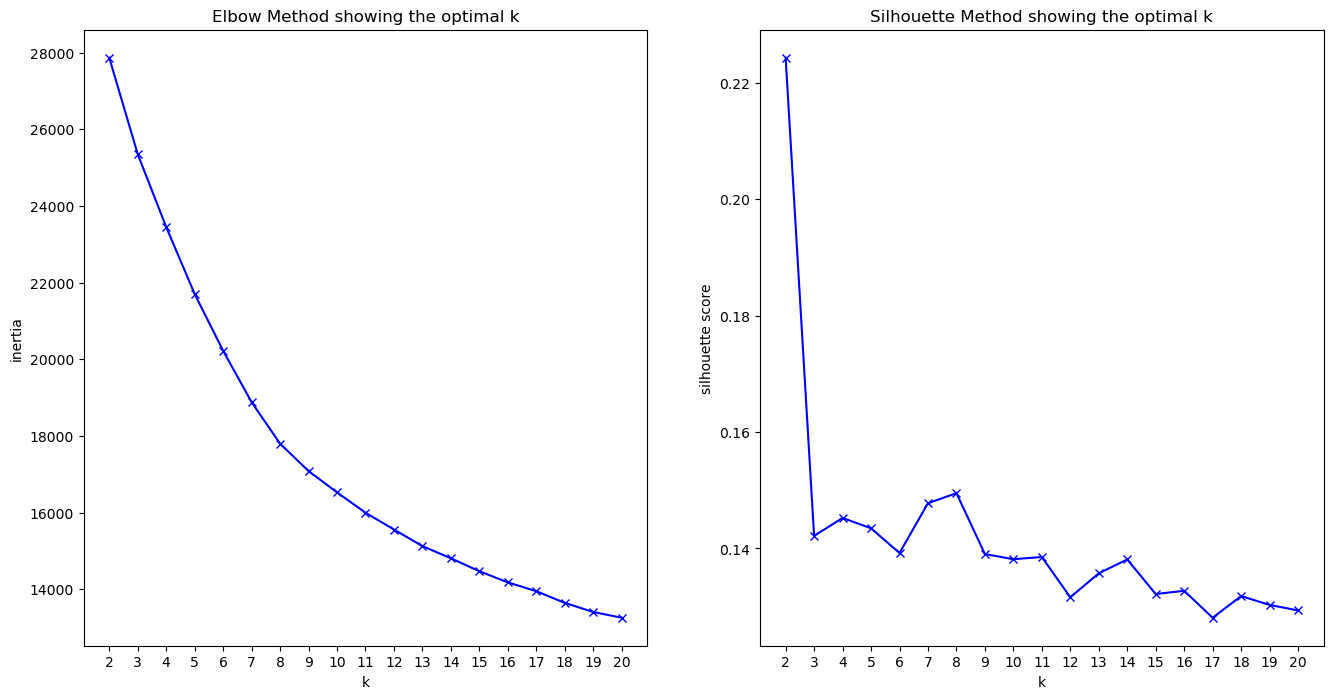

In [21]:
K = range(2, 21)

inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                    verbose=1)
    kmeans.fit(num_scaled_df)
    
    filename = "./kmeans_" + str(k) + ".pickle" # Path with filename
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)

    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(num_scaled_df, kmeans.predict(num_scaled_df)))


import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')

ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

## Loading the scaler for the best model

In [22]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as file: 
            return pickle.load(file) 
    except Exception as e: 
        print(e)
        print("File not found!") 

In [23]:
scaler2 = load("./scaler.pickle")
scaler2

StandardScaler()

In [24]:
best_model = load("./kmeans_8.pickle")

In [25]:
user_features_scaled = scaler2.transform(numerical)
user_features_scaled_df = pd.DataFrame(num_scaled, columns = numerical.columns)
clusters = best_model.predict(user_features_scaled_df)

In [26]:
silhouette_score(user_features_scaled_df, best_model.predict(user_features_scaled_df))

0.14948745303144123

In [27]:
songs["kmeans"] = clusters 
songs.head()

,Song,Artist,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,dataset,kmeans
0,Vampire,Olivia Rodrigo,4sSKTQcX6pQIncWcNJdkiD,0.675,0.609,1,-7.905,1,0.0940,0.284,0.268000,0.112,0.057,119.973,Hot,5
1,Last Night,Morgan Wallen,59uQI0PADDKeE6UZDTJEe8,0.517,0.675,6,-5.382,1,0.0357,0.459,0.000000,0.151,0.518,203.853,Hot,7
2,Fast Car,Luke Combs,1Lo0QY9cvc8sUB2vnIOxDT,0.712,0.603,8,-5.520,1,0.0262,0.186,0.000000,0.115,0.670,97.994,Hot,2
3,Calm Down,Rema & Selena Gomez,0WtM2NBVQNNJLh6scP13H8,0.801,0.806,11,-5.206,1,0.0381,0.382,0.000669,0.114,0.802,106.999,Hot,2
4,Flowers,Miley Cyrus,3MnewZrZDqej6thgEx3OB1,0.672,0.159,9,-8.760,0,0.0343,0.962,0.000018,0.106,0.117,113.218,Hot,6


In [28]:
songs["kmeans"].value_counts()

2    729
3    628
6    520
7    463
5    336
4    217
0    176
1     31
Name: kmeans, dtype: int64

## DBSCAN

In [29]:
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance_matrix
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

### Fine tuning

#### Step 1

In [30]:
d = distance_matrix(num_scaled_df,num_scaled_df)
print(d)

[[0.         3.90926563 3.36496633 ... 4.25845547 3.74930259 3.96604027]
 [3.90926563 0.         3.8846599  ... 4.00370152 3.76294352 2.45062629]
 [3.36496633 3.8846599  0.         ... 2.86268254 3.16920273 4.40772466]
 ...
 [4.25845547 4.00370152 2.86268254 ... 0.         3.59928473 4.11965453]
 [3.74930259 3.76294352 3.16920273 ... 3.59928473 0.         3.14189508]
 [3.96604027 2.45062629 4.40772466 ... 4.11965453 3.14189508 0.        ]]


#### Step 2

In [31]:
d2 = np.sort(d)[:,1:]
print(d2)

[[ 1.40183464  1.42790154  1.50726859 ...  9.81509682  9.87359551
   9.904086  ]
 [ 1.2073287   1.54161004  1.54304155 ... 10.61120494 10.6590105
  10.7722841 ]
 [ 0.68473921  0.73982914  0.82319451 ... 10.2283625  10.28816863
  10.36689052]
 ...
 [ 0.6724046   1.0917672   1.20125509 ... 10.05511012 10.18800538
  10.23847614]
 [ 0.49266828  0.74783021  1.00324958 ... 10.61697682 10.92213825
  10.93622407]
 [ 0.71136061  1.17819054  1.20766408 ... 10.94695272 11.10327328
  11.130022  ]]


#### Step 3

In [32]:
f = d2[:,22] # choose the number of features * 2
print(f) 

[1.78931821 1.96069456 1.2536012  ... 1.5064367  1.53377211 1.87162436]


#### Step 4

In [33]:
f_final = np.sort(f)[::-1]
print()
print(f_final)


[6.25623282 5.68105988 5.58770756 ... 1.10856836 1.09354121 1.09193694]


#### Step 5

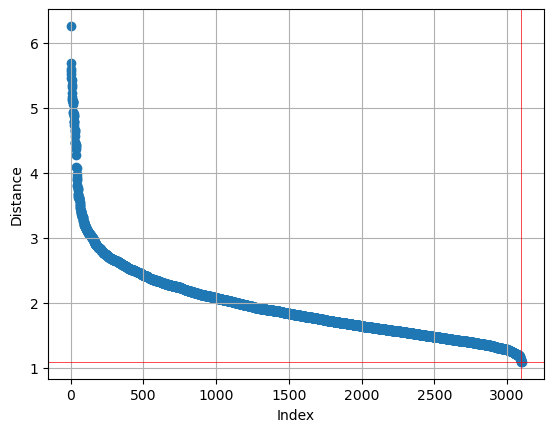

In [34]:
plt.scatter(range(1,len(f_final)+1), f_final)
plt.xlabel("Index")
plt.ylabel("Distance")
# Get the index of the distance which is closer to 0.5 as 0.5 is the default value for epsilon in DBSCAN
min_index = np.argmin(np.abs(f_final - 0.5))
xnew = min_index
ynew = f_final[min_index]
plt.axvline(xnew, color='red', linewidth=0.5)
plt.axhline(ynew, color='red', linewidth=0.5)
plt.grid()
plt.show()

### Exploring Epsilon values

In [35]:
models = {}

for value in np.arange(2.5, 4, 0.1):
    model = DBSCAN(eps=value, min_samples=22) # min_samples = 2 * #features
    # fit model and predict clusters
    yhat = model.fit_predict(num_scaled_df)
    score =  round(silhouette_score(num_scaled_df, model.fit_predict(num_scaled_df)),2)
    models["model_"+str(round(value,2))] = {"model":model,"yhat": yhat, "score": score}

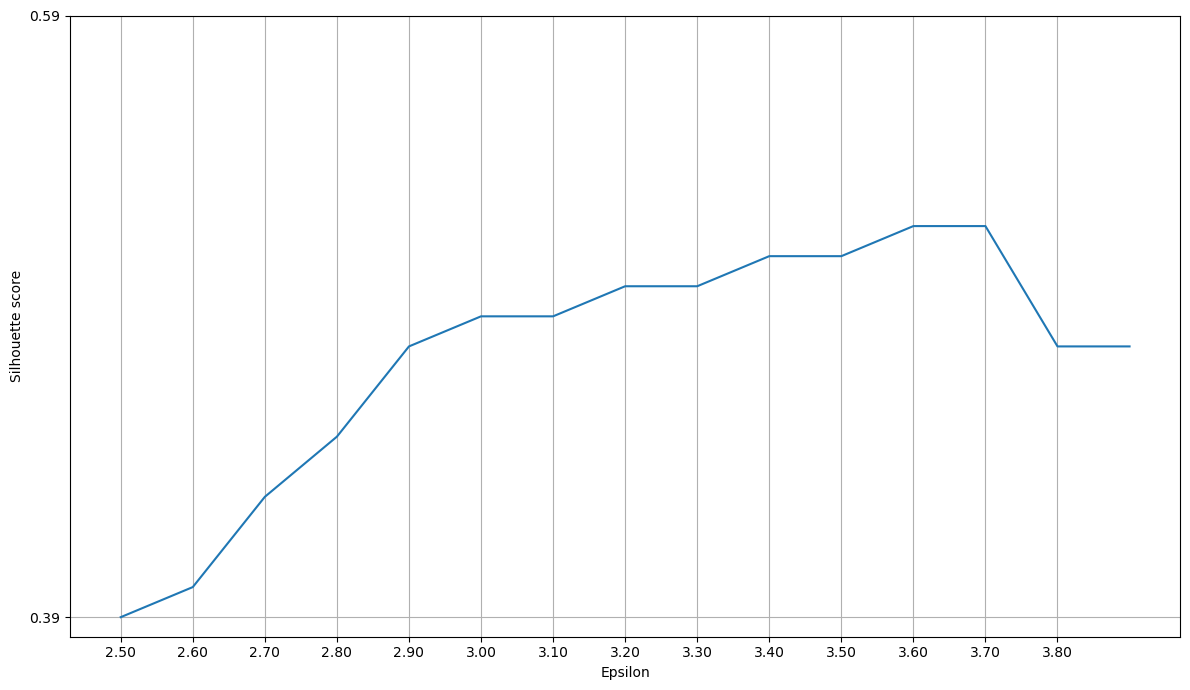

In [36]:
import matplotlib.ticker as ticker

epsilons = [round(value,2) for value in np.arange(2.5, 4, 0.1)]
scores = [item[1]["score"] for item in list(models.items())]

fig, ax = plt.subplots(figsize=(12,7))
ax.plot(epsilons, scores)
ax.set_xlabel("Epsilon")
ax.set_ylabel("Silhouette score")
ax.xaxis.set_ticks(np.arange(min(epsilons), max(epsilons), 0.1))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
ax.yaxis.set_ticks(np.arange(min(scores), max(scores)+0.1, 0.2))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
plt.grid()
plt.tight_layout()
plt.show()

Find the epsilon value which gives us the models with the highest Silhouette score

In [37]:
for i in np.arange(2.5, 4, 0.1):
    clusters_dbscan = np.unique(models[f'model_{round(i,1)}']["yhat"])
    print(f'Model {i}: {clusters_dbscan}')

Model 2.5: [-1  0]
Model 2.6: [-1  0]
Model 2.7: [-1  0]
Model 2.8000000000000003: [-1  0]
Model 2.9000000000000004: [-1  0]
Model 3.0000000000000004: [-1  0]
Model 3.1000000000000005: [-1  0]
Model 3.2000000000000006: [-1  0]
Model 3.3000000000000007: [-1  0]
Model 3.400000000000001: [-1  0]
Model 3.500000000000001: [-1  0]
Model 3.600000000000001: [-1  0]
Model 3.700000000000001: [-1  0]
Model 3.800000000000001: [-1  0  1]
Model 3.9000000000000012: [-1  0  1]


In [38]:
songs['dbscan'] = models['model_3.8']['yhat']
songs.head()

,Song,Artist,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,dataset,kmeans,dbscan
0,Vampire,Olivia Rodrigo,4sSKTQcX6pQIncWcNJdkiD,0.675,0.609,1,-7.905,1,0.0940,0.284,0.268000,0.112,0.057,119.973,Hot,5,0
1,Last Night,Morgan Wallen,59uQI0PADDKeE6UZDTJEe8,0.517,0.675,6,-5.382,1,0.0357,0.459,0.000000,0.151,0.518,203.853,Hot,7,0
2,Fast Car,Luke Combs,1Lo0QY9cvc8sUB2vnIOxDT,0.712,0.603,8,-5.520,1,0.0262,0.186,0.000000,0.115,0.670,97.994,Hot,2,0
3,Calm Down,Rema & Selena Gomez,0WtM2NBVQNNJLh6scP13H8,0.801,0.806,11,-5.206,1,0.0381,0.382,0.000669,0.114,0.802,106.999,Hot,2,0
4,Flowers,Miley Cyrus,3MnewZrZDqej6thgEx3OB1,0.672,0.159,9,-8.760,0,0.0343,0.962,0.000018,0.106,0.117,113.218,Hot,6,0


In [39]:
songs.shape

(3100, 17)

In [40]:
songs['dbscan'].value_counts()

 0    3069
 1      22
-1       9
Name: dbscan, dtype: int64

We consider the model that fits best our dataframe is the K-mean model. For the DBSCAN model, the number of clusters is too small, each cluster will be too big and generic. With the K-mean model the number of clusters obtained is 8.

## Save final dataframe with clusters

In [41]:
songs.to_csv('songs_clusters.csv', index=False)